In [7]:
from typing import List, Sequence, Literal
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import END, MessageGraph
from chains import generation_chain, reflection_chain

load_dotenv()

graph = MessageGraph()

REFLECT = "reflect"
GENERATE = "generate"

def generate_node(state):
    print("IN GENERATE NODE")
    return generation_chain.invoke({
        "messages": state
    })
    
def reflect_node(state):
    print("IN REFLECT NODE")
    return reflection_chain.invoke({
        "messages": state
    })
    

graph.add_node(GENERATE, generate_node)
graph.add_node(REFLECT, reflect_node)
graph.set_entry_point(GENERATE)


def should_continue(state):
    if (len(state) > 6):
        return "END" 
    return "REFLECT"


graph.add_conditional_edges(GENERATE, should_continue, path_map={
        "REFLECT": REFLECT,
        "END": END
    })

graph.add_edge(REFLECT, GENERATE)

app = graph.compile()

print(app.get_graph().draw_mermaid())
app.get_graph().print_ascii()


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	generate(generate)
	reflect(reflect)
	__end__([<p>__end__</p>]):::last
	__start__ --> generate;
	generate -. &nbsp;END&nbsp; .-> __end__;
	generate -. &nbsp;REFLECT&nbsp; .-> reflect;
	reflect --> generate;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

          +-----------+            
          | __start__ |            
          +-----------+            
                *                  
                *                  
                *                  
          +----------+             
          | generate |             
          +----------+             
          ...        ***           
         .              *          
       ..                **        
+---------+           +---------+  
| __end__ |           | reflect |  
+---------+           +---------+  


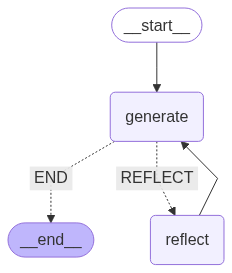

In [8]:
app

In [9]:
response = app.invoke(HumanMessage(content="AI Agents taking over content creation"))

print(response)

IN GENERATE NODE
IN REFLECT NODE
IN GENERATE NODE
IN REFLECT NODE
IN GENERATE NODE
IN REFLECT NODE
IN GENERATE NODE
[HumanMessage(content='AI Agents taking over content creation', additional_kwargs={}, response_metadata={}, id='95e451d7-31da-4464-89f7-16ef970ff7bd'), AIMessage(content='🚀✨ The future of content creation is here! 🤖🔥 AI agents are revolutionizing the way we produce, curate, and share content. From personalized articles to stunning visuals, these digital assistants are enhancing creativity and efficiency. Are you ready to embrace the AI revolution in your content strategy? 🌐✍️ #AI #ContentCreation #Innovation #TechTrends', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 59, 'total_tokens': 134, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name